# Act102 - Mathématiques actuarielles fondamentales de l'assurance vie

## Cours Table de Mortalité - Partie 2

Guillaume Gorge 2022
Cours du CNAM
https://www.markdownguide.org/basic-syntax/

# On l'on essaye de créer une table de mortalité moderne

#### Initialisation du système python

In [1]:
#import sys
#Stat Panda
#!{sys.executable} -m pip install pandas_profiling 
#Stat Assurance vie
#!{sys.executable} -m pip install lifelines    
#!{sys.executable} -m pip install seaborn  
#!{sys.executable} -m pip install xlrd
#!{sys.executable} -m pip install plotnine
#pip install pylexis

In [2]:
import os

# packages classiques pour gérer des données
import pandas as pd
import numpy as np

# graphiques
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#option pour que les graphes apparaissent dans Jupyter

# Stat sur Panda
import pandas_profiling 


In [3]:
#option pour que les graphes apparaissent dans Jupyter
%matplotlib inline 

#### Adresse des répertoires
Adresse à personnaliser selon environnement

In [4]:
BASE_PATH = 'C:/Users/guill/GitHub/Python/Actuariat/DataActuariat'
# image and mask directories
DataName = f'{BASE_PATH}/FD_DEC_2019.csv'
VarName = f'{BASE_PATH}/varmod_DEC_2019.csv'
DataNameExpo = f'{BASE_PATH}/pop-totale-france-metro.xls'

In [5]:
EXPOData = pd.read_excel(DataNameExpo)  
# A noter, nous avons fait quelques retraitements de forme sur le fichier pour simplifier sa lecture#EXPOData.head()

In [6]:
# Fichier fourni par l'INSEE avec toutes les modalités
VarDataName = pd.read_csv(VarName,sep=';')  # dictionnaire des variables
# Fonction pour imprimer les modalités
def ImprimeModalite(feature,dfName = VarDataName):
    Mod = dfName.loc[dfName['COD_VAR']==feature]
    display(Mod[['COD_MOD','LIB_MOD']])


In [7]:
DEATHData=pd.read_csv(DataName,sep=';')  


C:\Users\guill\GitHub\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (3,9,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
DEATHSynthese = DEATHData.groupby(["SEXE","ANAIS"])['SEXE'].count().rename('NombreMorts').to_frame()

In [9]:
EXPOMORTData = pd.merge(EXPOData[['SEXE','ANAIS','AGE','EXPOSITION','CENSURE']], DEATHSynthese, on=['SEXE','ANAIS'], how='left')
display(EXPOMORTData)

,SEXE,ANAIS,AGE,EXPOSITION,CENSURE,NombreMorts
0,1,2019,0,343009,False,1453
1,1,2018,1,348625,False,239
2,1,2017,2,354653,False,116
3,1,2016,3,366334,False,61
4,1,2015,4,376914,False,61
...,...,...,...,...,...,...
207,2,1918,101,3852,False,1861
208,2,1917,102,2490,False,1151
209,2,1916,103,1396,False,754
210,2,1915,104,946,False,515


In [10]:
def CalculPxMethode2(df=EXPOMORTData):
    df['Lx'] = df['EXPOSITION']
    df['Lx1'] = df['EXPOSITION'] - df['NombreMorts']
        # Selon la definition de Px
    df['Px'] = df['Lx1']/df['Lx'] 
    df['Qx'] = (1-df['Lx1']/df['Lx']) 



CalculPxMethode2(df=EXPOMORTData)
EXPOMORTData

#df.expanding(..., method='table') pour travailler avec plusieurs variables

,SEXE,ANAIS,AGE,EXPOSITION,CENSURE,NombreMorts,Lx,Lx1,Px,Qx
0,1,2019,0,343009,False,1453,343009,341556,0.995764,0.004236
1,1,2018,1,348625,False,239,348625,348386,0.999314,0.000686
2,1,2017,2,354653,False,116,354653,354537,0.999673,0.000327
3,1,2016,3,366334,False,61,366334,366273,0.999833,0.000167
4,1,2015,4,376914,False,61,376914,376853,0.999838,0.000162
...,...,...,...,...,...,...,...,...,...,...
207,2,1918,101,3852,False,1861,3852,1991,0.516874,0.483126
208,2,1917,102,2490,False,1151,2490,1339,0.537751,0.462249
209,2,1916,103,1396,False,754,1396,642,0.459885,0.540115
210,2,1915,104,946,False,515,946,431,0.455603,0.544397


# Extrapoler quand on n'a pas assez de données

### Diagramme de Lexis
https://en.wikipedia.org/wiki/Lexis_diagram

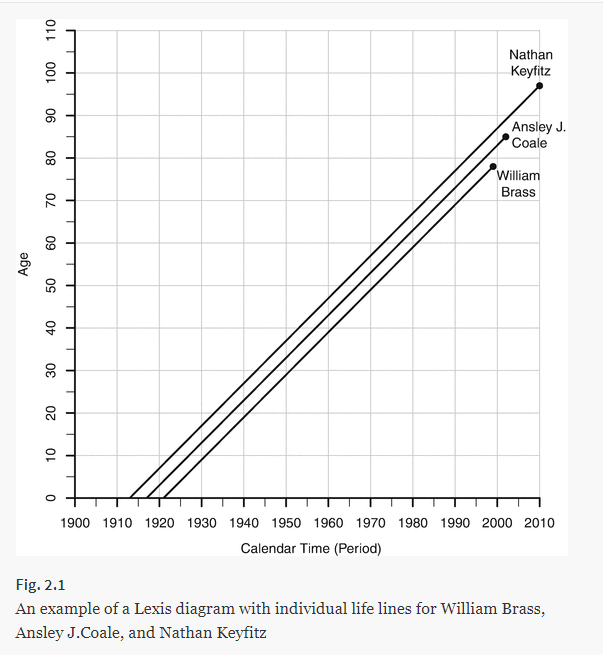

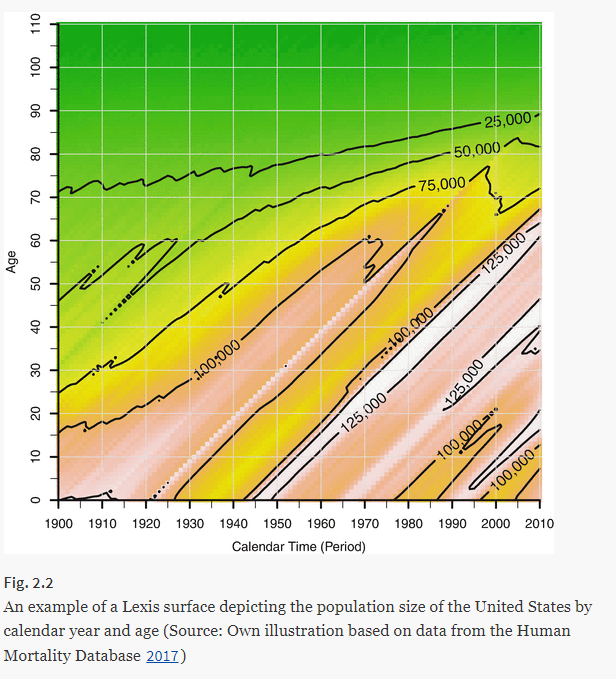

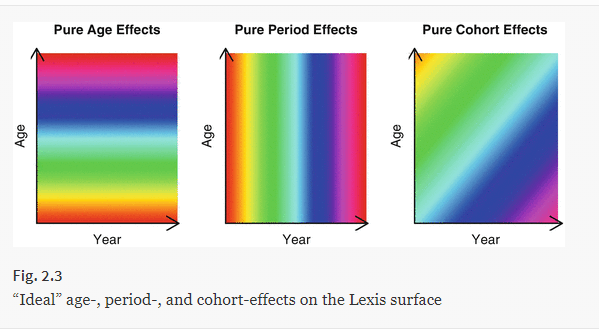
source : [Lexis Diagram](https://link.springer.com/chapter/10.1007/978-3-319-64820-0_2)

 ### Exercice (compliqué) 10 points à se partager pour le groupe qui fait le travail (5 pts max par personne ;)
    Les diagrammes de Lexis ne sont pas réellement programmés en Python alors qu'ils ne sont en R. 
    L'idée est de pouvoir graphiquer automatiquement la fig. 2.2 en plus du graphe sous jacent (on peut le faire via matrice colorée)

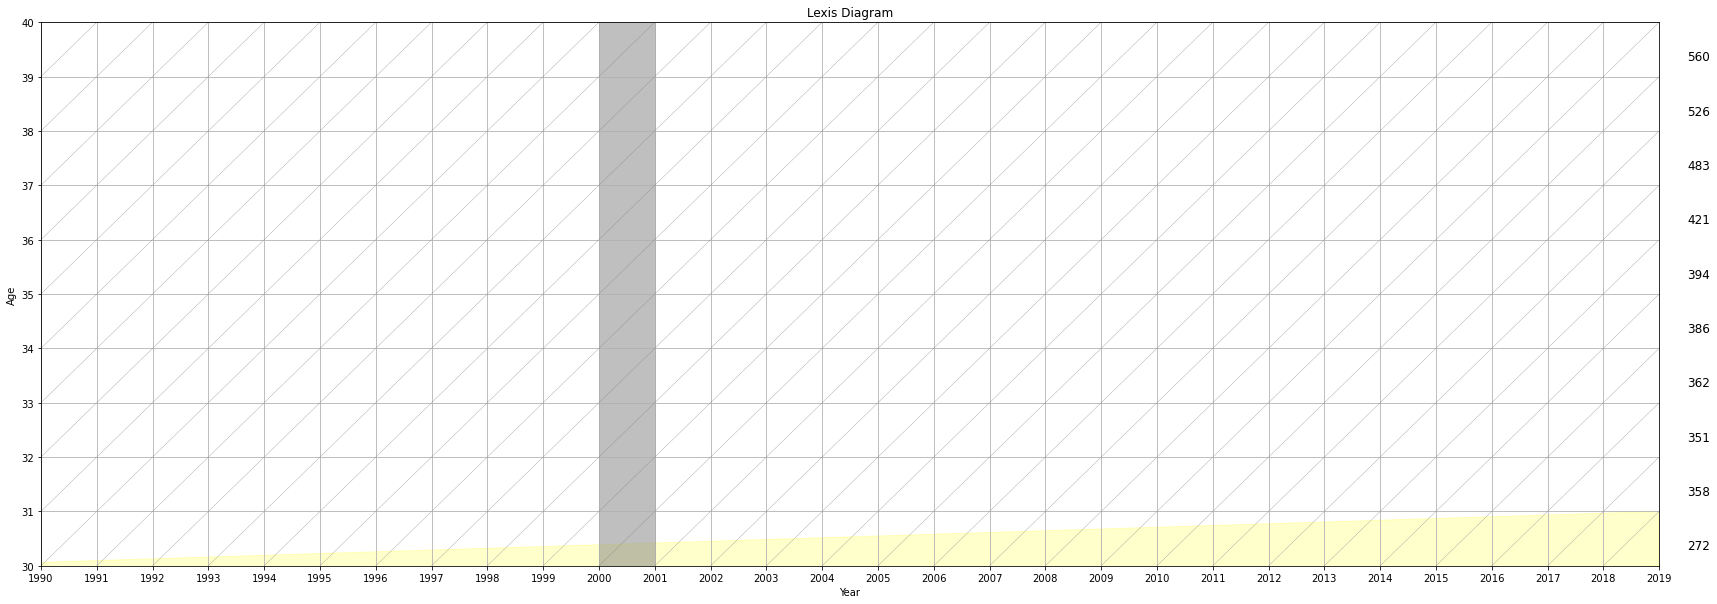

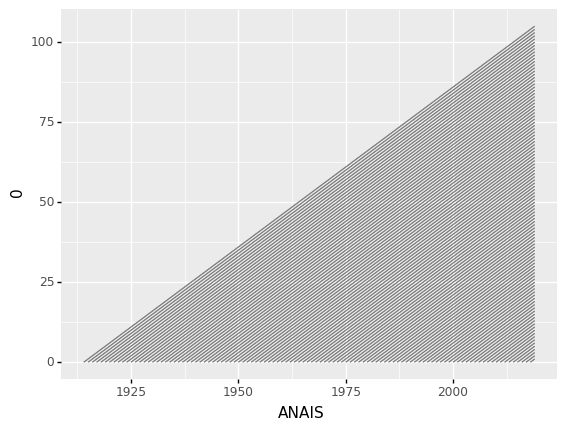

,COD_MOD,LIB_MOD
149,1,Masculin
150,2,Féminin


In [18]:
 
import pylexis
from plotnine import ggplot, geom_point, aes, geom_violin,theme,theme_minimal,geom_jitter,geom_segment

diagrammeLexis = pylexis.Diagram(1990, 2019, 30, 40)
diagrammeLexis.lexis_fill('cohort', 1988, "yellow")
diagrammeLexis.lexis_fill('year', 2000, "gray")


def AjouterPersonne(df=DEATHSynthese):
    df=df.reset_index()
    df = df[(df['SEXE']==1)]
    for index, row in df.iterrows():
        age= 2019-row['ANAIS']
        if age in range(30,40):diagrammeLexis.add_deaths(row['ANAIS'],2019,age,row['NombreMorts'])
AjouterPersonne()   


print(ggplot(EXPOData)
      +aes(x='ANAIS', xend=2019, y=0, yend='AGE')+
geom_segment(size=.4, colour="grey")
     )
 

### *Extrapoler* ou *Interpoler* ?

Ce qu'en pense Yann le Cun, l'un des fondateurs de l'Apprentissage profondu (deep learning)
https://www.youtube.com/watch?v=86ib0sfdFtw

> Pour opposer les deux, 
- Inter-poler, c'est quand on reste dans l'espace où on a des observations (par exemple, quelle est la probabilité de mourir dans l'année à 31.5 ans). Dans ce cas, le choix du modèle est moins important.
- Extra-poler, c'est quand on quitte l'espace où on a des observations ("quelle est la probabilité de mourir dans l'année d'une personne de 115 ans ?). Dans ce cadre, le choix du modèle est important.

## Gompetz, Makeham et Compagnie : les principaux modèles utilisés

Avant de regarder les modèles utilisés, regardons les propriétés que nous avons pu établir : 

#### Propriété 1 : 
> $q_x$ croissant avec l'âge : chaque année, notre probabilité de mourir augmente.

Cette propriété parait assez classique mais en pratique, elle n'est pas toujours respectée. Par exemple, on constate un mortalité importante des jeunes sur la route  : 
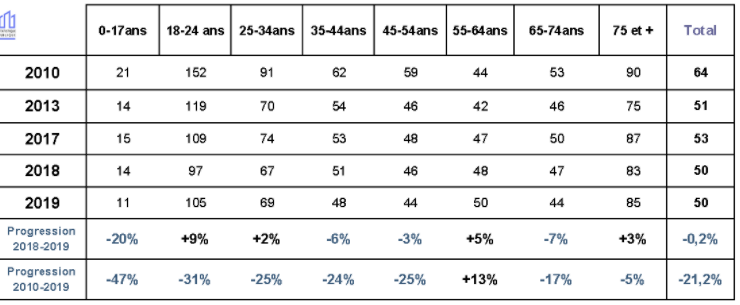

qui a longtemps fait une "bosse" de surmortalité autour de 18-25 ans surtout pour les hommes : 
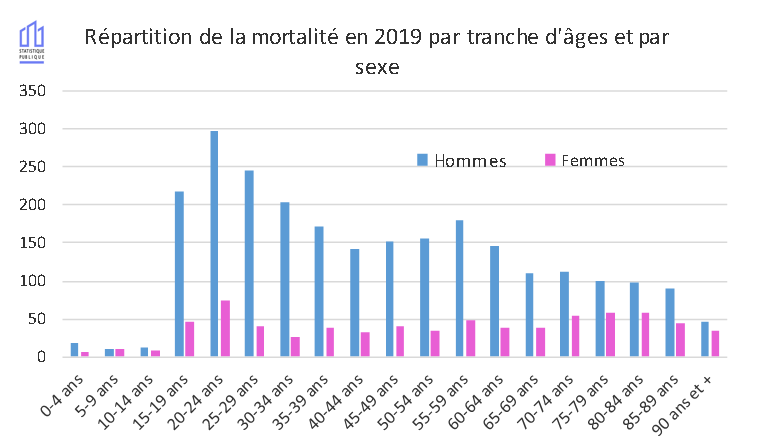


Source : [Sécurité routière](https://www.onisr.securite-routiere.gouv.fr/etat-de-l-insecurite-routiere/bilans-annuels-de-la-securite-routiere/bilan-2019-de-la-securite-routiere#:~:text=La%20mortalit%C3%A9%20rapport%C3%A9e%20%C3%A0%20la,tu%C3%A9s%20par%20million%20d'habitants.)

In [13]:
EXPOMORTData[(EXPOMORTData['SEXE']==1) & (EXPOMORTData['AGE'].between(14, 30, inclusive = True) )]


,SEXE,ANAIS,AGE,EXPOSITION,CENSURE,NombreMorts,Lx,Lx1,Px,Qx
14,1,2005,14,405934,False,44,405934,405890,0.999892,0.000108
15,1,2004,15,405931,False,73,405931,405858,0.999820,0.000180
16,1,2003,16,405172,False,74,405172,405098,0.999817,0.000183
17,1,2002,17,405928,False,136,405928,405792,0.999665,0.000335
18,1,2001,18,410971,False,149,410971,410822,0.999637,0.000363
19,1,2000,19,413039,False,209,413039,412830,0.999494,0.000506
20,1,1999,20,385174,False,218,385174,384956,0.999434,0.000566
21,1,1998,21,378431,False,225,378431,378206,0.999405,0.000595
22,1,1997,22,362439,False,205,362439,362234,0.999434,0.000566
23,1,1996,23,361955,False,211,361955,361744,0.999417,0.000583


In [14]:
ImprimeModalite('SEXE')

,COD_MOD,LIB_MOD
149,1,Masculin
150,2,Féminin


### Et l'on revient à Duvillard !

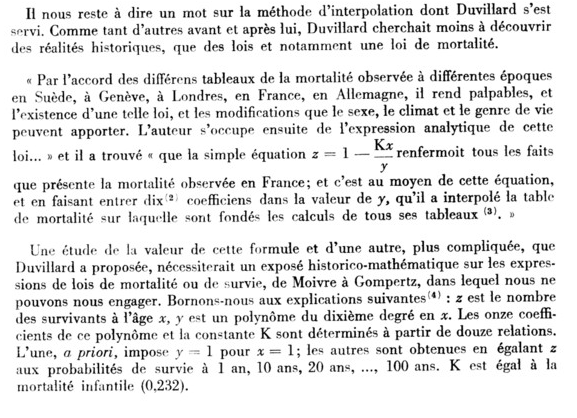

Soit $ l_x= z= 1-\frac{Kx}{y(x)}$. Le terme y(x) permet justement tenir compte de la propriété 1 en augmentant les décès avec l'âge.

### Définition du taux instantané de mortalité

#### Rappel de la définition de $q_x$

> Le taux de mortalité $q_{x,t}$ est la probabilité qu'une personne d'âge $x$ vivant au moment $t$ meurt dans l'année ($t$,$t+1$)

Dans la pratique, le passage par des modèles paramétriques fait que l'on préfère utiliser un modèle continu et non un modèle instantané.





#### Définition de la force de mortalité 
> On note la *force de mortalité* au moment $t$ pour les personnes d'age $x$ par $\mu_{x,t}$. 
On peut aussi considérer cette force de mortalité $\mu_{x,t}$ comme le *taux de mortalité instantané*. 
La probabilité qu'une personne soumise à cette force $\mu_{x,t}$ meurt dans l'intervalle (t,t+dt) est approximativement $\mu_{x,t}dt$ quand $dt$ est petit.

#### Exercice
Démontrer La probabilité qu'une personne soumise à cette force $\mu_{x,t}$ meurt dans l'intervalle (t,t+dt) est approximativement $\mu_{x,t}dt$ quand $dt$ est petit en utilisant les développement limités.


### Lien entre $\mu_{x,t}$ et $q{x,t}$

En considérant que $\mu_{x,t}dt$ est constant entre $x$ et $x+1$, on peut démontrer que : 
    $$ q_{x,t} \approx 1 - exp(-\mu_{x,t}) $$

#### Exercice
Démontrer cette approximation. 
Element de réponse : 

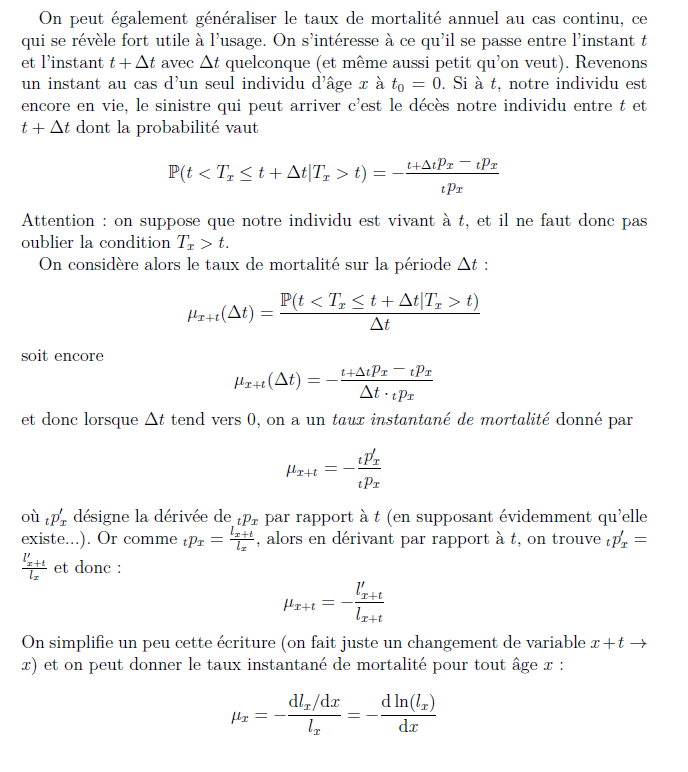


GLM http://www.macs.hw.ac.uk/~iain/research/Paper_2013.pdf

### Modèle de Gompetz

Gompertz (1825) a observé que la force de mortalité $\mu_x$ , lorsqu'elle était tracée sur l'échelle logarithmique, était
âge approximativement linéaire pendant la majeure partie de la vie adulte. 
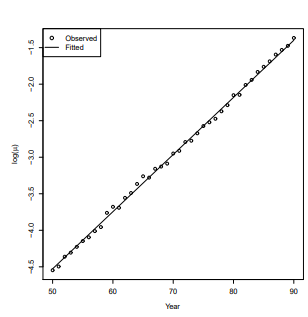


Ainsi, sur les données masculines américaines en 1960, on voit que le modèle de Gompertz semble s'adapter très bien aux données
Pratiquement, $\mu_x$  augmente de façon exponentielle avec l'âge :
$$ \mu_x = Bc^{x} $$ où $B$ et $c$ sont des constantes.

* $\mu_x$ respecte notre première propriété et augmente avec l'âge.

Cependant, se pose le problème de prendre en compte les causes de décès qui ne seraient pas directement liées à l'âge.

C'est ainsi que William Makeham propose d'extrapoler $\mu_x$ aux grands âges sur la base d'une loi de Gompertz modifiée et tenant compte des causes de décès indépendantes de l'âge :
$$ \mu_x = A + Bc^{x} $$
où $A$ est le risque de mourir pour l'ensemble des causes indépendantes de l'âge.

source : [wikipedia](https://fr.wikipedia.org/wiki/Mod%C3%A8le_de_Gompertz)

<AxesSubplot:xlabel='AGE', ylabel='Qx'>

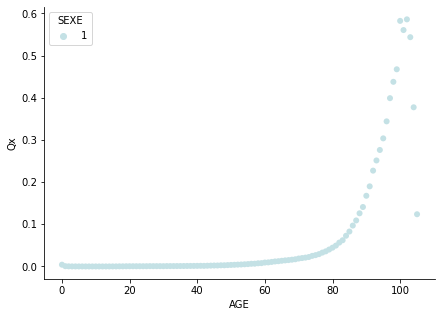

In [41]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

EXPOMORTDataHomme = EXPOMORTData[(EXPOMORTData['SEXE']==1)]
sns.scatterplot(data=EXPOMORTDataHomme,x="AGE", y="Qx",
                hue="SEXE",  
                palette="ch:r=-.2,d=.3_r" ,
                sizes=(1, 8), linewidth=0,
                  ax=ax)
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.scatterplot(data=y,x="AGE", y="MUx",
                palette="ch:r=-.2,d=.3_r" ,label="observé",
                sizes=(1, 8), linewidth=0,
                  ax=ax)
 
ax.legend()

en passant au log : 
    $$ log(\mu_x) = log(B) + log(C)X$$
    
soit $$ log(\mu_x) = b + cX$$ par un changement des paramêtres.
    

On peut donc estimer avec un modèle lineaire généralisé Poisson (du fait de l'indépendance entre les x,t) et avec lien *log*. C'est ce qu'on appelle le *lien canonique* pour une GLM avec une erreur de Poisson (à retenir car TRES Utilisé !).
    
  A noter que l'on peut travailler directement sur le nombre de décès en ajoutant un *offset* sur l'évolution de la population $e_{x,t}$ est une mesure de la taille moyenne de la population âgée de $x$ à la date de l'année civile t, exposition dite centrale au risque. 
    
source :[Fitting models of mortality with generalized linear and
non-linear models](http://www.macs.hw.ac.uk/~iain/research/Paper_2013.pdf)
      $$ q_{x,t} \approx 1 - exp(-\mu_{x,t}) $$

In [173]:
EXPOMORTData['MUx'] = -np.log(-(EXPOMORTData['Qx']-1))

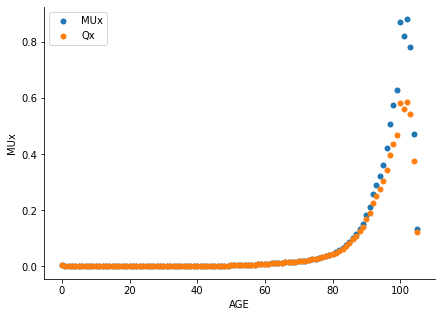

In [177]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
EXPOMORTDataHomme = EXPOMORTData[(EXPOMORTData['SEXE']==1)]
sns.scatterplot(data=EXPOMORTDataHomme,x="AGE", y="MUx",
                palette="ch:r=-.2,d=.3_r" ,label="MUx",
                sizes=(1, 8), linewidth=0,
                  ax=ax)
sns.scatterplot(data=EXPOMORTDataHomme,x="AGE", y="Qx",
                palette="ch:r=-.2,d=.3_r" ,label="Qx",
                sizes=(1, 8), linewidth=0,
                  ax=ax)
ax.set_title('Comparaison entre Qx et Mux')
ax.legend()

On voit que $q_x$ et $\mu_x$ sont très proches quand $q_x$ est stable.

### Modèle linéaire Généralisé

Pour programmer en python un GLM : [video](https://www.youtube.com/watch?v=__oC5IRCFKI)

In [179]:

Y = EXPOMORTData[(EXPOMORTData['AGE'].between(0,100))]['MUx']
X = EXPOMORTData[(EXPOMORTData['AGE'].between(0,100))][['AGE','SEXE']]
import statsmodels.api as sm
modelPoisson = sm.GLM(Y,X,family=sm.families.Poisson(link=sm.families.links.log()) )
resultsPoisson = modelPoisson.fit()
resultsPoisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    MUx   No. Observations:                  202
Model:                            GLM   Df Residuals:                      200
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36.321
Date:                Sat, 05 Mar 2022   Deviance:                       31.108
Time:                        09:57:37   Pearson chi2:                     114.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.0237      0.010      2.426      0.015       0.005       0.043
SEXE          -3.4558      0.682     -5.069      0.000      -4.792      -2.120
==============================================================================
"""

In [180]:
y = EXPOMORTData[(EXPOMORTData['SEXE']==1)][['MUx','AGE','SEXE']]
y['MUxhat'] = resultsPoisson.predict(exog=y[['AGE','SEXE']])
y

,MUx,AGE,SEXE,MUxhat
0,0.004245,0,1,0.031562
1,0.000686,1,1,0.032318
2,0.000327,2,1,0.033091
3,0.000167,3,1,0.033883
4,0.000162,4,1,0.034695
...,...,...,...,...
101,0.822016,101,1,0.344249
102,0.881481,102,1,0.352490
103,0.784317,103,1,0.360929
104,0.473784,104,1,0.369569


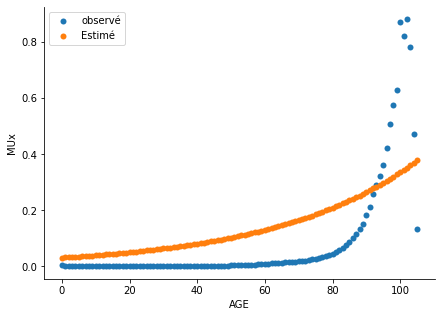

In [181]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.scatterplot(data=y,x="AGE", y="MUx",
                palette="ch:r=-.2,d=.3_r" ,label="observé",
                sizes=(1, 8), linewidth=0,
                  ax=ax)
sns.scatterplot(data=y,x="AGE", y="MUxhat",
                palette="ch:r=-.2,d=.3_r" ,label="Estimé",
                sizes=(1, 8), linewidth=0,
                  ax=ax)
ax.legend()

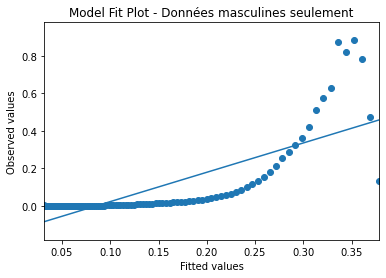

In [183]:
from statsmodels.graphics.api import abline_plot

#fig, ax = plt.subplots()
 
line_fit = sm.OLS(y['MUx'],sm.add_constant(y['MUxhat'], prepend=True)).fit()
fig=abline_plot(model_results=line_fit)

ax = fig.axes[0]
ax.scatter(y['MUxhat'], y['MUx'])
ax.margins(.1)
ax.set_title('Model Fit Plot - Données masculines seulement')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');
plt.show()



Le modèle de Gompertz ne capture pas la très forte augmentation à 80 ans.

# Modèle de Cox : intégrer l'evolution de l'espérance de vie

#### import de Lifeline
https://lifelines.readthedocs.io/en/latest/
lifelines is a complete survival analysis library, written in pure Python. 

In [15]:
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

# Espérances de vie

Jusqu'à 80 ans...


# Exercices


 

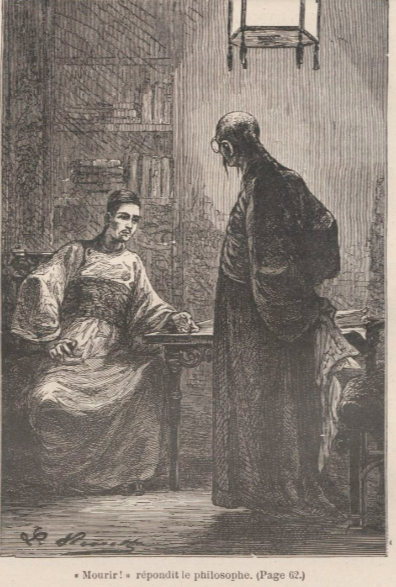